# WeatherPY

### Analysis on WeatherPY
-  The plot on Latitude vs Temperature shows that the temperature is highest at the equator and lowest at the poles.
-  The humidity at the equator is in the range from 50%-100%. Howeever, the trends does not change based on the latitude.
-  There seems to be no co-relation of cloudliness with respect to the latitude.
-  The windspeed for most cities fall under 20mph and there seems to be no trend on the windspeed with respect to the latitude.


In [1]:
# Dependencies
import random
import requests as req

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from citipy import citipy
import openweathermapy as owm

#To get the current date
import datetime
now = datetime.datetime.now()

In [2]:
# Create a settings object with your API key and preferred units
api_key = "4af76c79df8d11f6295bc8323877e2e5"
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [3]:
# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,2500)
long_samples=random.sample(long,2500)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_DF=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_DF["City"]=""
cities_DF["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_DF.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_DF.set_value(index, "City", city.city_name)
    cities_DF.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the excat co-ordinates of the city
cities_DF=cities_DF.drop(cities_DF.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_DF=cities_DF.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 800 cities 
cities_DF=cities_DF.sample(n=800)

# Resetting the index of the cities list
cities_DF=cities_DF.reset_index(drop=True)

cities_DF.head()

,City,Country
0,zeya,ru
1,vardo,no
2,luangwa,zm
3,nevyansk,ru
4,thai binh,vn


## Perform API Calls

In [4]:
# Get data for each city in cities_DF
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nBeginning Data Retrieval\n-----------------------------")
#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in cities_DF.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print("\n\033[1;31mCity not found. Skipping...\033[1;30m")

print("\n-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
-----------------------------

Processing record 1|zeya,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=zeya,ru

Processing record 2|vardo,no

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=vardo,no

Processing record 3|luangwa,zm

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=luangwa,zm

Processing record 4|nevyansk,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=nevyansk,ru

Processing record 5|thai binh,vn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=thai+binh,vn

Processing record 6|constitucion,cl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=constitucion,cl

Processing record 7|wanning,cn

https://api.openw


Processing record 55|piacabucu,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=piacabucu,br

Processing record 56|abu samrah,qa

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=abu+samrah,qa

City not found. Skipping...

Processing record 57|sibolga,id

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=sibolga,id

Processing record 58|monterey,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=monterey,us

Processing record 59|gberia fotombu,sl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=gberia+fotombu,sl

Processing record 60|butaritari,ki

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=butaritari,ki

Processing record 61|kapoeta,sd

https://api


Processing record 108|sao filipe,cv

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=sao+filipe,cv

Processing record 109|samarai,pg

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=samarai,pg

Processing record 110|anshun,cn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=anshun,cn

Processing record 111|kobojango,bw

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kobojango,bw

City not found. Skipping...

Processing record 112|nemuro,jp

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=nemuro,jp

Processing record 113|letterkenny,ie

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=letterkenny,ie

Processing record 114|hangu,cn

https://api.openweatherm


Processing record 161|bud,no

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bud,no

Processing record 162|kaa-khem,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kaa-khem,ru

Processing record 163|le mars,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=le+mars,us

Processing record 164|northam,au

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=northam,au

Processing record 165|nyurba,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=nyurba,ru

Processing record 166|aklavik,ca

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=aklavik,ca

Processing record 167|palmer,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295b


Processing record 215|guerrero negro,mx

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=guerrero+negro,mx

Processing record 216|abay,kz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=abay,kz

Processing record 217|tongzi,cn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=tongzi,cn

Processing record 218|pacific grove,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=pacific+grove,us

Processing record 219|turukhansk,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=turukhansk,ru

Processing record 220|russell,nz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=russell,nz

Processing record 221|yar-sale,ru

https://api.openweathermap.org/data/2.5/


City not found. Skipping...

Processing record 266|san francisco,ar

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=san+francisco,ar

Processing record 267|malwan,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=malwan,in

City not found. Skipping...

Processing record 268|myitkyina,mm

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=myitkyina,mm

Processing record 269|urdoma,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=urdoma,ru

Processing record 270|saint-joseph,re

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=saint-joseph,re

Processing record 271|kalmunai,lk

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kalmunai,lk

Processing record


Processing record 318|pochutla,mx

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=pochutla,mx

Processing record 319|santa rosa,ar

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=santa+rosa,ar

Processing record 320|dongli,cn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=dongli,cn

Processing record 321|ormara,pk

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=ormara,pk

Processing record 322|gayny,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=gayny,ru

Processing record 323|geraldton,au

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=geraldton,au

Processing record 324|amparafaravola,mg

https://api.openweathermap.org/data/2.5/weather?appid=


Processing record 370|podgornoye,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=podgornoye,ru

Processing record 371|viedma,ar

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=viedma,ar

Processing record 372|olinda,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=olinda,br

Processing record 373|souillac,mu

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=souillac,mu

Processing record 374|japura,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=japura,br

City not found. Skipping...

Processing record 375|naze,jp

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=naze,jp

Processing record 376|vestmannaeyjar,is

https://api.openweathermap.org/da


Processing record 423|maraa,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=maraa,br

Processing record 424|muros,es

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=muros,es

Processing record 425|manama,bh

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=manama,bh

Processing record 426|taos,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=taos,us

Processing record 427|ambodifototra,mg

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=ambodifototra,mg

City not found. Skipping...

Processing record 428|kavaratti,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kavaratti,in

Processing record 429|coihaique,cl

https://api.openweathermap.org/dat


Processing record 476|sao bernardo,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=sao+bernardo,br

Processing record 477|sikar,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=sikar,in

Processing record 478|auki,sb

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=auki,sb

Processing record 479|banda aceh,id

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=banda+aceh,id

Processing record 480|karkaralinsk,kz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=karkaralinsk,kz

City not found. Skipping...

Processing record 481|shimoda,jp

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=shimoda,jp

Processing record 482|talnakh,ru

https://api.openweat


Processing record 527|santa vitoria do palmar,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=santa+vitoria+do+palmar,br

Processing record 528|mandera,ke

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=mandera,ke

Processing record 529|lakes entrance,au

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=lakes+entrance,au

Processing record 530|elizabeth city,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=elizabeth+city,us

Processing record 531|hithadhoo,mv

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=hithadhoo,mv

Processing record 532|corn island,ni

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=corn+island,ni

Processing record 533|port 


City not found. Skipping...

Processing record 579|abha,sa

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=abha,sa

Processing record 580|acapulco,mx

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=acapulco,mx

Processing record 581|bolzano,it

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bolzano,it

Processing record 582|port-cartier,ca

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=port-cartier,ca

Processing record 583|baracoa,cu

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=baracoa,cu

Processing record 584|illoqqortoormiut,gl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=illoqqortoormiut,gl

City not found. Skipping...

Processing record


Processing record 634|georgetown,sh

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=georgetown,sh

Processing record 635|biryusinsk,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=biryusinsk,ru

Processing record 636|lubin,pl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=lubin,pl

Processing record 637|camden,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=camden,us

Processing record 638|leh,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=leh,in

Processing record 639|maragogi,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=maragogi,br

Processing record 640|zavodouspenskoye,ru

https://api.openweathermap.org/data/2.5/weather?appid=4a


Processing record 687|bredasdorp,za

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bredasdorp,za

Processing record 688|yinchuan,cn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=yinchuan,cn

Processing record 689|mehamn,no

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=mehamn,no

Processing record 690|asahikawa,jp

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=asahikawa,jp

Processing record 691|vostok,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=vostok,ru

Processing record 692|nuevo progreso,mx

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=nuevo+progreso,mx

Processing record 693|cherskiy,ru

https://api.openweathermap.org/data/2.5/we


Processing record 741|tutrakan,bg

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=tutrakan,bg

Processing record 742|cape town,za

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=cape+town,za

Processing record 743|bolungarvik,is

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bolungarvik,is

City not found. Skipping...

Processing record 744|karaul,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=karaul,ru

City not found. Skipping...

Processing record 745|pervomayskoye,ua

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=pervomayskoye,ua

City not found. Skipping...

Processing record 746|temaraia,ki

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q


Processing record 791|kapit,my

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kapit,my

Processing record 792|khandbari,np

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=khandbari,np

Processing record 793|gashua,ng

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=gashua,ng

Processing record 794|halifax,ca

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=halifax,ca

Processing record 795|sao domingos,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=sao+domingos,br

Processing record 796|bambous virieux,mu

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bambous+virieux,mu

Processing record 797|pingliang,cn

https://api.openweathermap.org/data/2.5

## Weather DataFrame 

In [5]:
# Create an "extracts" object to get the various parameter required to form the weather data table
summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness
0,Zeya,RU,1513961988,53.74,127.27,-15.55,56,2.98,68
1,Vardo,NO,1513957800,70.37,31.11,30.20,79,13.87,40
2,Luangwa,ZM,1513961988,-12.88,28.25,71.98,77,4.21,0
3,Nevyansk,RU,1513961988,57.49,60.21,18.43,92,5.61,48
4,Thai Binh,VN,1513961989,20.45,106.33,58.21,96,4.50,92


In [6]:
# Save the result to a csv file
weather_data.to_csv("Output/Weather_Data.csv")
# Count of the data in the dataframe
weather_data.count()

City           701
Country        701
Date           701
Latitude       701
Longitude      701
Temperature    701
Humidity       701
Wind speed     701
Cloudliness    701
dtype: int64

## Latitude vs Temperature Plot

In [7]:
# Creating a function to set the properties of the graph
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)

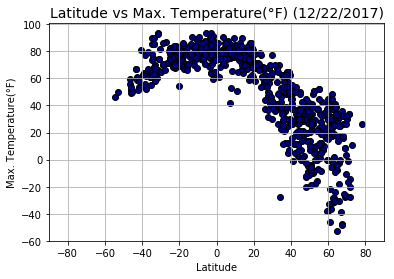

In [8]:
# Latitude vs Max. Temperature(F)
plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="navy",edgecolors="black")
plotprops("Latitude","Max. Temperature(°F)",[-90,90])
plt.savefig("Output/City Latitude vs Temperature.jpeg")
plt.show()

## Latitude vs Humidity Plot

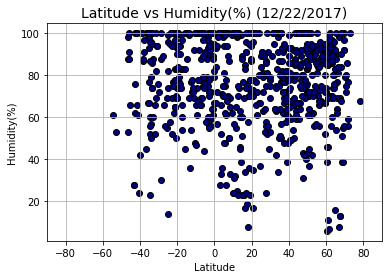

In [9]:
# Latitude vs Humidity

plt.scatter(x=weather_data["Latitude"],y=weather_data["Humidity"],facecolors="navy",edgecolors="black")
plotprops("Latitude","Humidity(%)",[-90,90])
plt.savefig("Output/City Latitude vs Humidity.jpeg")
plt.show()

## Latitude vs Cloudliness

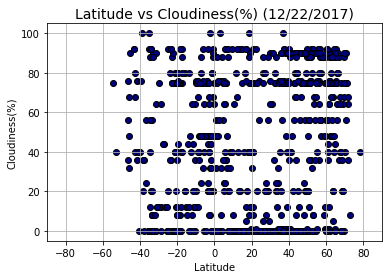

In [10]:
# Latitude vs Cloudliness  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Cloudliness"],facecolors="navy",edgecolors="black")
plotprops("Latitude","Cloudiness(%)",[-90,90])
plt.savefig("Output/City Latitude vs Cloudiness.jpeg")
plt.show()

## Latitude vs Wind Speed  

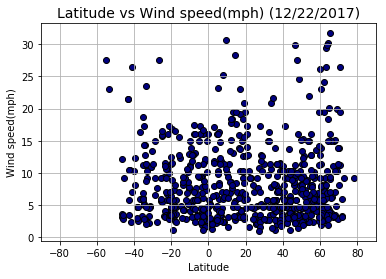

In [11]:
# Latitude vs Wind Speed  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Wind speed"],facecolors="navy",edgecolors="black")
plotprops("Latitude","Wind speed(mph)",[-90,90])
plt.savefig("Output/City Latitude vs Wind speed.jpeg")
plt.show()